<class 'numpy.ndarray'>
areas:  [6.7 4.6 3.5 5.5]
prices:  [9.1 5.9 4.6 6.7]
data_size:  4


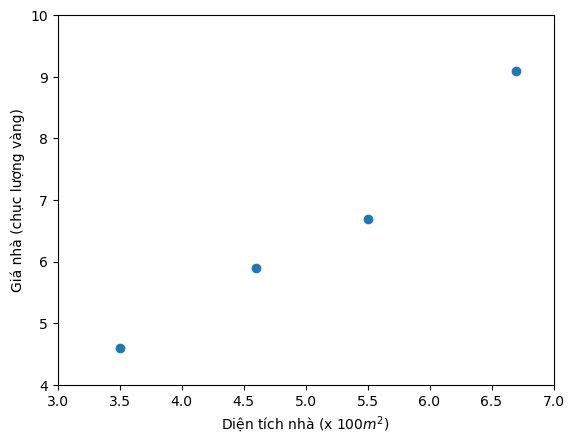

In [19]:
# load data
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('../dataset/house_price_data.csv', delimiter=',')
areas = data[1:,0]
prices = data[1:,1]
data_size = areas.size

print(type(areas))
print('areas: ', areas)
print('prices: ', prices)
print('data_size: ', data_size)

# Naive implementation
plt.scatter(areas, prices)
plt.xlabel('Diện tích nhà (x 100$m^2$)')
plt.ylabel('Giá nhà (chục lượng vàng)')
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

<img src="../md_img/3.png" width="350" height="350">

In [20]:
# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]
print(data)

[[6.7 1. ]
 [4.6 1. ]
 [3.5 1. ]
 [5.5 1. ]]


In [21]:
# init weight
eta = 0.01
theta = np.array([-0.34, 0.04]) # [w, b]
print('theta: ', theta)

theta:  [-0.34  0.04]


In [22]:
# how long
epoch_max = 1
# mini-batch size
m = 2
for epoch in range(epoch_max):
    sum_of_losses = 0
    gradients = np.zeros((2,))
    for j in range(0, m, m):
        for index in range(j, j+m):
            xi = data[index]
            yi = prices[index]
            print('\ndata: ', xi, yi)

            # predict z/o
            oi = xi.dot(theta)
            print('z: ', oi)

            # compute loss
            li = (oi-yi)*(oi-yi)
            print('loss: ', index, li)

            # compute gradient
            g_li = 2*(oi-yi)
            print('g_li: ', g_li)
            gradient_i = xi*g_li
            print('gradient_i: ', index, gradient_i)

            gradients = gradients + gradient_i
            sum_of_losses = sum_of_losses + li
        
        sum_of_losses = sum_of_losses/2 # m=2
            
        gradients     = gradients/2 # m=2
        print('\ngradients: ', gradients)

        theta = theta - eta*gradients
        print('new params: ', theta)





data:  [6.7 1. ] 9.1
z:  -2.238
loss:  0 128.550244
g_li:  -22.676
gradient_i:  0 [-151.9292  -22.676 ]

data:  [4.6 1. ] 5.9
z:  -1.524
loss:  1 55.115776000000004
g_li:  -14.848
gradient_i:  1 [-68.3008 -14.848 ]

gradients:  [-110.115  -18.762]
new params:  [0.76115 0.22762]


In [ ]:
# plt.plot(losses)
# plt.xlabel('iteration')
# plt.ylabel('losses')
# plt.show()